## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.75, 0.55]

In [14]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.8897 - accuracy: 0.6864 - val_loss: 1.3972 - val_accuracy: 0.5257
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.8765 - accuracy: 0.6920 - val_loss: 1.5075 - val_accuracy: 0.5062
Experiment with momentum = 0.750000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________

50000/50000 [==============================] - 6s 124us/step - loss: 1.4256 - accuracy: 0.5014 - val_loss: 1.4650 - val_accuracy: 0.4836
Epoch 47/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4202 - accuracy: 0.5030 - val_loss: 1.4738 - val_accuracy: 0.4821
Epoch 48/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4155 - accuracy: 0.5045 - val_loss: 1.4880 - val_accuracy: 0.4750
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4102 - accuracy: 0.5079 - val_loss: 1.4647 - val_accuracy: 0.4820
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4044 - accuracy: 0.5097 - val_loss: 1.4551 - val_accuracy: 0.4878
Experiment with momentum = 0.550000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________________

Epoch 44/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5475 - accuracy: 0.4603 - val_loss: 1.5655 - val_accuracy: 0.4491
Epoch 45/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5428 - accuracy: 0.4623 - val_loss: 1.5701 - val_accuracy: 0.4448
Epoch 46/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5381 - accuracy: 0.4637 - val_loss: 1.5570 - val_accuracy: 0.4500
Epoch 47/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5332 - accuracy: 0.4655 - val_loss: 1.5714 - val_accuracy: 0.4469
Epoch 48/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5298 - accuracy: 0.4675 - val_loss: 1.5591 - val_accuracy: 0.4529
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5250 - accuracy: 0.4683 - val_loss: 1.5539 - val_accuracy: 0.4538
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5205 - accuracy: 0.4705 - 

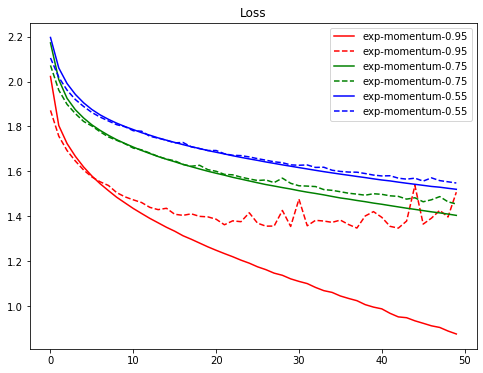

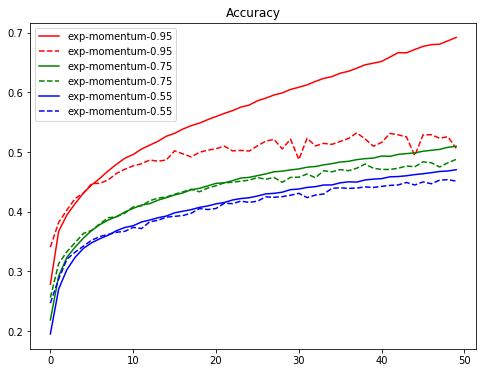

In [15]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.9662 - accuracy: 0.6607 - val_loss: 1.3768 - val_accuracy: 0.5240
Epoch 50/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.9793 - accuracy: 0.6551 - val_loss: 1.3143 - val_accuracy: 0.5436
Experiment with momentum = 0.750000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4304 - accuracy: 0.4996 - val_loss: 1.4817 - val_accuracy: 0.4730
Epoch 48/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4228 - accuracy: 0.5024 - val_loss: 1.4767 - val_accuracy: 0.4769
Epoch 49/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4185 - accuracy: 0.5027 - val_loss: 1.4703 - val_accuracy: 0.4781
Epoch 50/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4127 - accuracy: 0.5052 - val_loss: 1.4744 - val_accuracy: 0.4757
Experiment with momentum = 0.550000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________

Epoch 45/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5415 - accuracy: 0.4647 - val_loss: 1.5595 - val_accuracy: 0.4513
Epoch 46/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5373 - accuracy: 0.4668 - val_loss: 1.5558 - val_accuracy: 0.4531
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5326 - accuracy: 0.4686 - val_loss: 1.5590 - val_accuracy: 0.4458
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5280 - accuracy: 0.4707 - val_loss: 1.5479 - val_accuracy: 0.4531
Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5242 - accuracy: 0.4695 - val_loss: 1.5418 - val_accuracy: 0.4568
Epoch 50/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5199 - accuracy: 0.4728 - val_loss: 1.5463 - val_accuracy: 0.4559


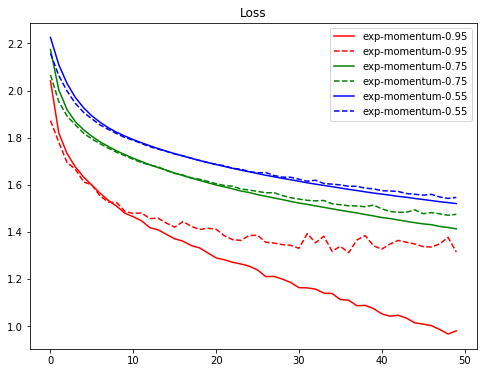

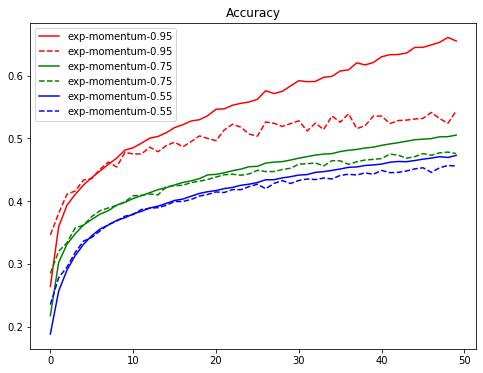

In [17]:

import matplotlib.pyplot as plt
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()